In [ ]:
# Importing all necessary libraries
import cv2
import os
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb

  
# Read the video from specified path
cam = cv2.VideoCapture("new_data.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

In [4]:
import glob 
import numpy as np
from skimage.io import imshow, imread

img_dir = "data" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1)
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY) 
    data.append(img) 

In [50]:
# Sharpen detection kernel
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Edge detection kernel
edge = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])

# Blur kernel
blur = (1 /9) * np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])


# Gaussin 3*3
gaussian = (1 / 16) * np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])


# Gaussin 5*5
gaussian_five_kernel = (1/256) * np.array([[1,4,6,4,1],
                                           [4,16,24,16,4],
                                           [6,24,36,24,6],
                                           [4,16,24,16,4],
                                           [1,4,6,4,1]])


In [45]:
new_data = data[200:230]

In [46]:
sharpen_detect = []
for img in new_data:
    sharpen_img = cv2.filter2D(src=img, ddepth=-1, kernel=sharpen)
    sharpen_detect.append(sharpen_img)

In [47]:
edge_detect = []
for img in new_data:
    edge_img = cv2.filter2D(src=img, ddepth=-1, kernel=edge)
    edge_detect.append(edge_img)

In [48]:
blur_detect = []
for img in new_data:
    blur_img = cv2.filter2D(src=img, ddepth=-1, kernel= blur)
    blur_detect.append(blur_img)

In [51]:
gaussian_detect = []
for img in new_data:
    gaussian_img = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian_five_kernel)
    gaussian_detect.append(gaussian_img)

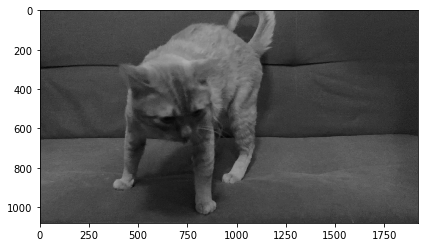

In [53]:
imshow(blur_detect[25])

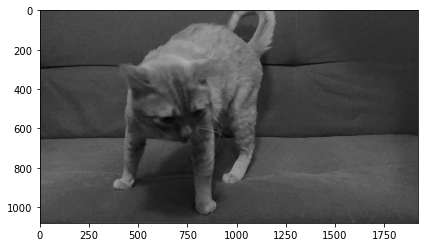

In [54]:
imshow(gaussian_detect[25])

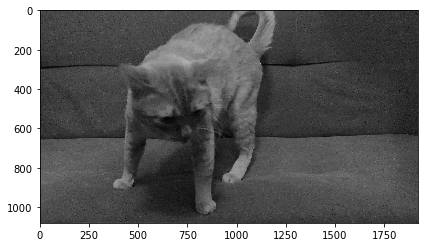

In [55]:
imshow(sharpen_detect[25])